## Top line analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [2]:
df_demo= pd.read_csv('../data/cleaned/final_demo_cleaned.csv')  
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,Unknown,2,45105.30,6,9
1,2304905,7,94,58,Unknown,2,110860.30,6,9
2,1439522,5,64,32,Unknown,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5
70605,8981690,12,148,31,Male,2,101867.07,6,6
70606,333913,16,198,61,Female,2,40745.00,3,3
70607,1573142,21,255,68,Male,3,475114.69,4,4


In [4]:
df_demo.columns


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

## Client behavior analysis
**Who are the primary clients using this online process?**

**Assumptions** : 
- we only consider the variation Test - Control as it indicates that a client was part of the experiment after than UI changes and provides insights into how the changes affect client behavior.
- Moving forward we determined if there are commonalities among the clients who enganged in the process. 
- we conduct AB testing Test vs Control to better analyze the customer experience fully



In [4]:
df_web = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/cleaned_web_data.csv", sep=",")
df_exp = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/experiment_clients_clean.csv", sep=",")

df_web, df_exp

(        client_id             visitor_id                      visit_id  \
 0         9988021   580560515_7732621733  781255054_21935453173_531117   
 1         9988021   580560515_7732621733  781255054_21935453173_531117   
 2         9988021   580560515_7732621733  781255054_21935453173_531117   
 3         9988021   580560515_7732621733  781255054_21935453173_531117   
 4         9988021   580560515_7732621733  781255054_21935453173_531117   
 ...           ...                    ...                           ...   
 755400    9668240   388766751_9038881013   922267647_3096648104_968866   
 755401    9668240   388766751_9038881013   922267647_3096648104_968866   
 755402    9668240   388766751_9038881013   922267647_3096648104_968866   
 755403    9668240   388766751_9038881013   922267647_3096648104_968866   
 755404     674799  947159805_81558194550   86152093_47511127657_716022   
 
        process_step            date_time  
 0            step_3  2017-04-17 15:27:07  
 1        

In [5]:
#inner join to merge two tables to identify target customers 

df_web_exp = df_web.merge(df_exp[['client_id', 'variation']],
    on='client_id',
    how='inner'
)

df_web_exp

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [6]:
# focus on Test and Control, hence disregard NaN in variation column for data accuracy

#Create a copy of the DataFrame 
df_Test_Control = df_web_exp.copy()

# Remove NaN values from the entire DataFrame
df_Test_Control.dropna(inplace=True)

print(df_Test_Control['variation'].value_counts(dropna=False))

variation
Test       177847
Control    143462
Name: count, dtype: int64


In [8]:
df_Test_Control

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
417650,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
417651,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
417652,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
417653,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [7]:
# merge df_Test_Control (excl.NaN) and df_demo in order to have a more accurate customer experience dataframe

df_Total = df_Test_Control.merge(
    df_demo[['client_id','clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']],
    on="client_id",
    how="inner"
)

df_Total

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.86,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.86,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.86,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.86,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.86,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,153238.83,3,6
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,Male,3,141808.05,6,9
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,Male,3,141808.05,6,9
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,Male,3,141808.05,6,9


## Client behavior analysis
**Are the primary clients younger or older, new or long-standing?**

In [10]:
df_Total['clnt_tenure_yr'].unique()

array([ 5, 22, 12,  6, 11, 21, 13, 15, 10, 29,  7, 16, 28, 20, 23, 17, 14,
        4, 24,  9, 30, 25, 26,  8, 33, 18, 19,  3, 34, 27, 32, 31, 50, 35,
       37, 39,  2, 38, 36,  0, 55, 43, 40, 47, 48, 42, 46, 49, 51, 45, 41,
       54, 44, 52])

In [11]:
df_Total['clnt_tenure_yr'].min()

np.int64(0)

In [12]:
df_Total['clnt_tenure_yr'].max()

np.int64(55)

In [13]:
# Relationship break down : new or long lasting relationships?

# Define the containers with bins to create tenure categories 

bins = [-1, 3, 9, 19, df_Total['clnt_tenure_yr'].max()]
labels = ["New (0–3)", 
          "Emerging (4–9)", 
          "Established (10–19)", 
          "Long-standing (20+)"
]

df_Total["tenure_group"] = pd.cut(df_Total['clnt_tenure_yr'], bins=bins, labels=labels)

tenure_summary = (df_Total["tenure_group"].value_counts().sort_index().to_frame("count"))

tenure_summary["percentage"] = (
    tenure_summary["count"] / tenure_summary["count"].sum() * 100
).round(2)

print(tenure_summary)

                      count  percentage
tenure_group                           
New (0–3)              2726        0.85
Emerging (4–9)       139884       43.54
Established (10–19)  124569       38.77
Long-standing (20+)   54130       16.85


In [14]:
#checking the age of the clients 

df_Total['clnt_age'].describe()

count    321309.000000
mean         48.247852
std          15.684498
min           0.000000
25%          34.000000
50%          50.000000
75%          61.000000
max          96.000000
Name: clnt_age, dtype: float64

In [15]:
df_Total['clnt_age'].unique()

array([79, 34, 63, 44, 29, 27, 53, 56, 32, 61, 38, 66, 36, 65, 57, 54, 58,
       46, 30, 49, 42, 48, 33, 70, 31, 59, 72, 26, 45, 25, 24, 35, 28, 19,
       75, 71, 68, 50, 18, 73, 52, 39, 62, 22, 64, 51, 60, 74, 40, 21, 23,
       78, 43, 20, 47, 37, 67, 84, 55, 41, 82, 88, 76, 77, 87, 81, 69, 85,
       83, 80, 89, 86, 17, 91,  0, 95, 92, 93, 94, 90, 96])

In [16]:
# new column 'age category' clustering different age groups

df_Total['age_category'] = np.select(
    [
        df_Total['clnt_age'] <= 19,
        df_Total['clnt_age'].between(20, 39),
        df_Total['clnt_age'].between(40, 64),
        df_Total['clnt_age'] >= 65
    ],
    ['Young', 'Adult', 'Middle Adult', 'Old'],
    default='Unknown')

df_Total

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,tenure_group,age_category
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.86,1,4,Emerging (4–9),Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,153238.83,3,6,Established (10–19),Middle Adult
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,Male,3,141808.05,6,9,Long-standing (20+),Adult
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,Male,3,141808.05,6,9,Long-standing (20+),Adult
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,Male,3,141808.05,6,9,Long-standing (20+),Adult


In [17]:
df_Total['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [18]:
df_Total['age_category'].value_counts()


age_category
Middle Adult    162292
Adult           103370
Old              52652
Young             2995
Name: count, dtype: int64

In [19]:
df_Total['age_category'].value_counts(normalize=True) * 100

age_category
Middle Adult    50.509634
Adult           32.171523
Old             16.386718
Young            0.932125
Name: proportion, dtype: float64

In [20]:
# high level gender break down 

gender_counts = df_Total['gendr'].value_counts()

In [21]:
# gender break down focused on Middle adult category ( 50% of age_category)

df_Total[df_Total['age_category'] == 'Middle Adult']['gendr'].value_counts()

gendr
Female        58364
Male          57332
Unknown       46591
Non-binary        5
Name: count, dtype: int64

In [22]:
df_Total[df_Total['age_category'] == 'Middle Adult']['gendr'].value_counts(normalize = True)*100

gendr
Female        35.962339
Male          35.326449
Unknown       28.708131
Non-binary     0.003081
Name: proportion, dtype: float64

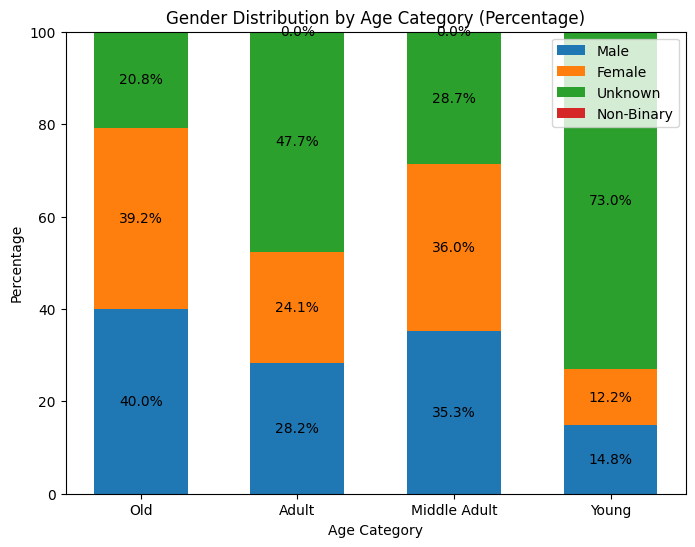

In [23]:

# Bar chart combining age_category and gender 



age_categories = df_Total['age_category'].unique()

# Calculate total counts for each age category
age_totals = np.array([df_Total[df_Total['age_category'] == age].shape[0] for age in age_categories])

# Calculate percentages for each gender
gender_percentages = {
    'Male': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Male')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)]),
    'Female': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Female')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)]),
    'Unknown': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Unknown')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)]),
    'Non-Binary': np.array([df_Total[(df_Total['age_category'] == age) & (df_Total['gendr'] == 'Non-binary')].shape[0] / total * 100 for age, total in zip(age_categories, age_totals)])
}

width = 0.6  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bottom = np.zeros(len(age_categories))

for gender, percentages in gender_percentages.items():
    p = ax.bar(age_categories, percentages, width, label=gender, bottom=bottom)
    bottom += percentages
    ax.bar_label(p, label_type='center', fmt='%.1f%%')  # Display as percentage

ax.set_xlabel('Age Category')
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution by Age Category (Percentage)')
ax.legend()

plt.show()

#### Completion Rate

completion_rate = completed_users / started_users

In [12]:
# considering only clients that started 
# TODO clarify what to do with the  clients that confirm but never start 

started = set(df_web_exp.loc[df_web_exp["process_step"] == "start", "client_id"])

completed = (
    df_web_exp[(df_web_exp["process_step"] == "confirm") & (df_web_exp["client_id"].isin(started))]
    .groupby("variation")["client_id"]
    .nunique()
)

started_users = (
    df_web_exp[df_web_exp["process_step"] == "start"]
    .groupby("variation")["client_id"]
    .nunique()
)

completion_rate = completed / started_users
completion_rate

variation
Control    0.654699
Test       0.690131
Name: client_id, dtype: float64

#### Completion Rate - LIFT

In [13]:
#LIFT = completion_rate(test) - completion_rate(control) / completion_rate(control) 

lift = (completion_rate.loc['Test'] - completion_rate.loc['Control']) / completion_rate.loc['Control']
print(lift)

0.054118727432863126


- We used the completion rate of 'Test' and 'Control' in order to evaluate the cost-effectiveness of the new application.

- We calculated the increase of completion rate (lift) and the result showed that the test group increased 5.4% of the completion rate in comparaison with the control group, which match the minimum threshold established by Vanguard of 5%.

#### Bounce Rate

In [14]:
#number-of-people-who-started-and-didn't-go-any-further/total_number_of_people_who_started
started_set = set(df_web_exp.loc[df_web_exp["process_step"] == "start", "client_id"])
non_bouncers = set(df_web_exp.loc[df_web_exp["process_step"].isin(['step_3', 'step_2', 'step_1', 'confirm']), "client_id"])
print(len(non_bouncers))

44761


In [15]:
bouncer_set = started_set.difference(non_bouncers)

In [16]:
display(len(bouncer_set))

5739

In [17]:
bouncer_df = (
    df_web_exp[(df_web_exp["client_id"].isin(bouncer_set))]
    .groupby("variation")["client_id"]
    .nunique()
)


bouncer_rate = bouncer_df / started_users
bouncer_rate

variation
Control    0.140403
Test       0.091982
Name: client_id, dtype: float64

In [18]:
display(bouncer_df)

variation
Control    3285
Test       2454
Name: client_id, dtype: int64

In [19]:
bouncer_control = bouncer_df.loc['Control']
bouncer_test = bouncer_df.loc['Test']
print(bouncer_control, bouncer_test)

3285 2454


In [20]:
size_test = started_users.loc['Test']
conversion_test = completed.loc['Test']

In [21]:
size_control = started_users.loc['Control']
conversion_control = completed.loc['Control']

In [22]:
from statsmodels.stats.proportion import proportions_ztest

count = [bouncer_control, bouncer_test]
nobs = [size_control, size_test]

# one-sided test (test > control) -- characteristic of the group -- a proportion
stat, p_value = proportions_ztest(count, nobs, alternative='larger')
print("z-statistic:", stat)
print("p-value:", p_value)

ModuleNotFoundError: No module named 'statsmodels'

#### Interpretation of the Bounce Rate statistical test:

**H0** : bounce_rate(test) >= bounce_rate(control) 

**H1**: bounce_rate(test) < bounce_rate(control)


The p-value (6.743654105432252e-65) 


- We compared the bounce rate of the **control group** and the **test group**.


- We used a two-proportion z-test. We chose this test because we considered the bounce rate as a binary outcome (quit vs. did not quit), and we want to determine whether the bounce rate is smaller in the test group than in the control group. 

- The results show that the test group’s bounce rate (0.091982) is smaller than the control group’s rate (0.140403), with a p-value well below 0.05. This means we have strong statistical evidence that the new version of the app decrease the bounce rate compared with the control.